In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv('IrisSample.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class,NumericClass,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,5.8,4.0,1.2,0.2,Iris-setosa,0,0,1,0,0
1,5.7,4.4,1.3,0.4,Iris-setosa,0,1,1,0,1
2,5.1,3.4,1.5,0.2,Iris-setosa,0,0,1,0,2
3,5.4,3.9,1.7,0.4,Iris-setosa,0,0,1,0,2
4,4.3,3.0,1.1,0.1,Iris-setosa,0,1,1,0,1
5,4.9,2.4,3.3,1.0,Iris-versicolor,1,1,1,1,0
6,5.9,3.0,4.2,1.5,Iris-versicolor,1,1,1,2,1
7,6.6,3.0,4.4,1.4,Iris-versicolor,1,2,1,1,2
8,5.0,2.3,3.3,1.0,Iris-versicolor,1,1,1,2,0
9,6.2,2.9,4.3,1.3,Iris-versicolor,1,1,1,1,0


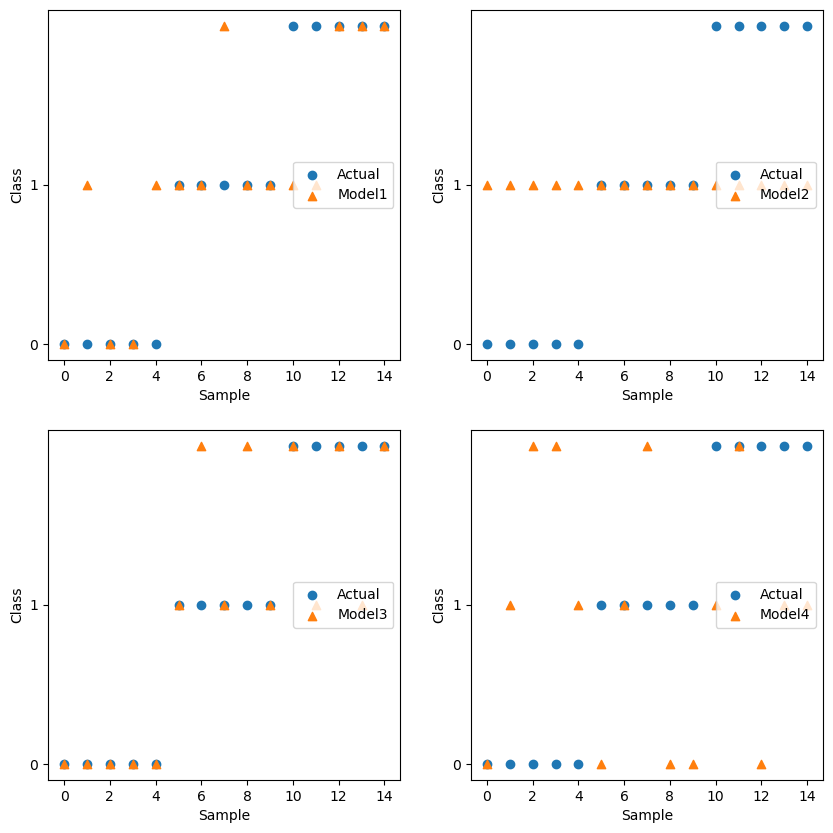

In [5]:
models = ['Model1','Model2','Model3','Model4']
NumericClass = [0,1,2]

plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    plt.scatter(df.index, df['NumericClass'],label='Actual')
    plt.scatter(df.index, df[model.replace(' ','') + '_Prediction'],
                label=model,marker='^')
    plt.yticks([0,1])
    plt.legend(loc=7)
    plt.xlabel('Sample')
    plt.ylabel('Class')

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

cnf_matrix = confusion_matrix(df['NumericClass'],df['Model1_Prediction'],labels=NumericClass)
cnf_matrix

array([[3, 2, 0],
       [0, 4, 1],
       [0, 2, 3]])

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

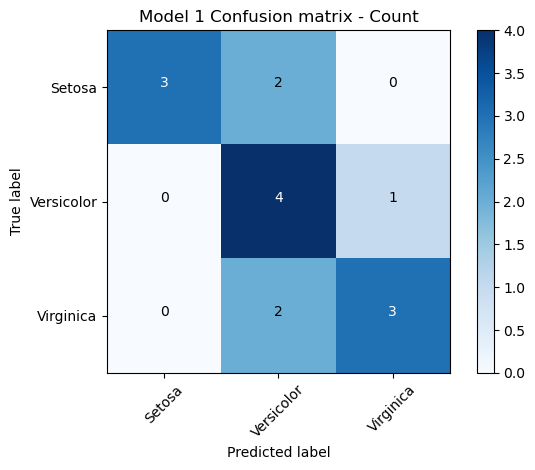

In [13]:
# Plot confusion matrix
# Class Names
# Setosa = 0, Versicolor = 1, Virginica = 2 
classes = ['Setosa','Versicolor','Virginica']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Model 1 Confusion matrix - Count')

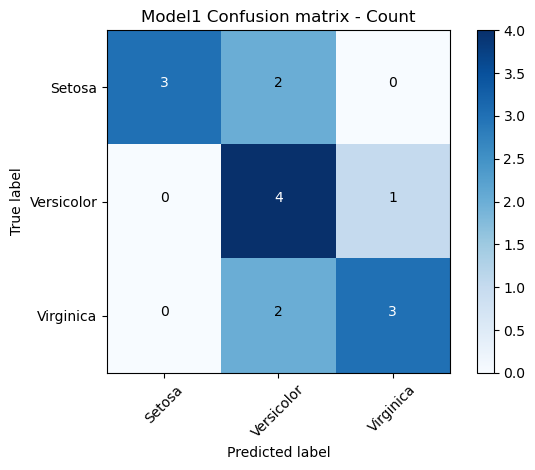

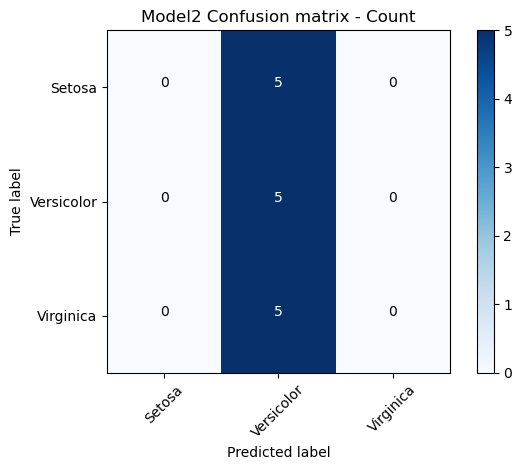

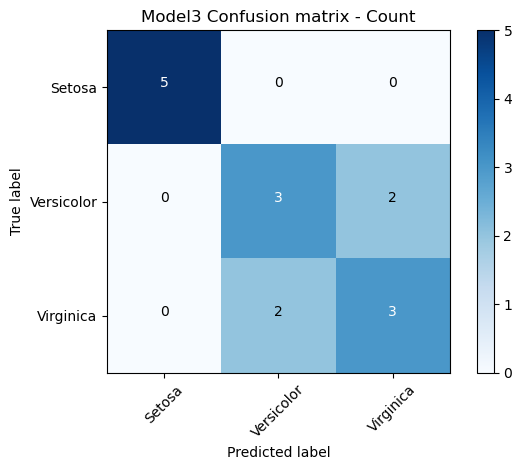

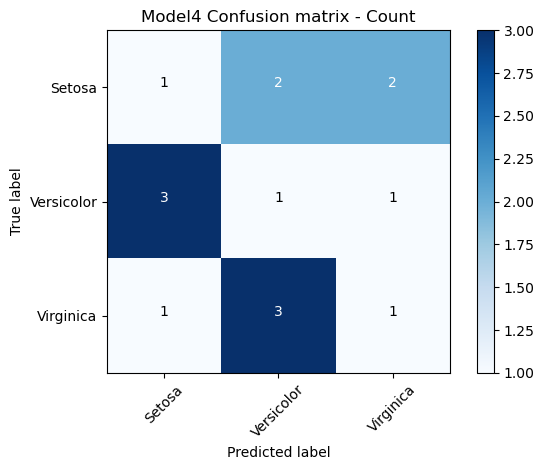

In [15]:
# Plot confusion matrix
# Show actual counts
for model in models:
    #print(model)
    cnf_matrix = confusion_matrix(df['NumericClass'],
                                  df[model.replace(' ','') + '_Prediction'],
                                  labels=NumericClass)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes,
                      title= model + ' Confusion matrix - Count', normalize=False)

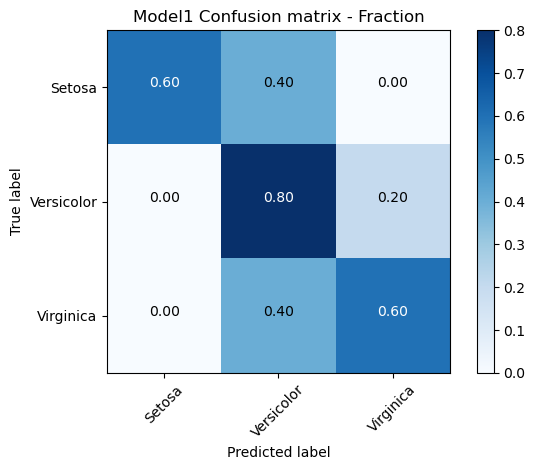

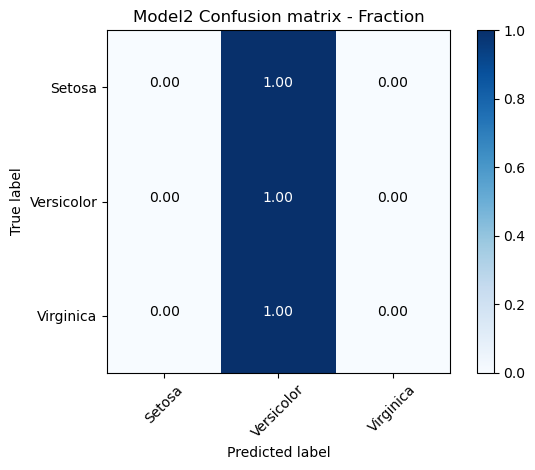

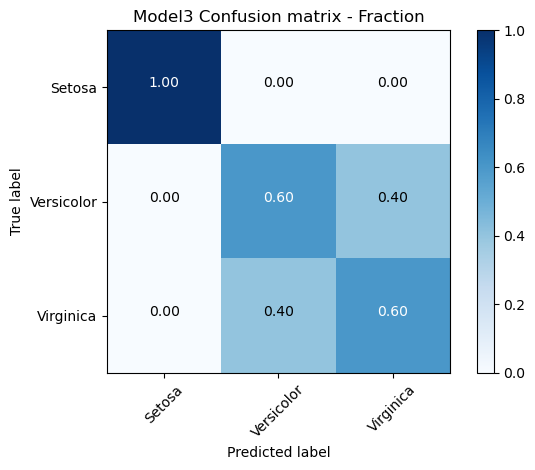

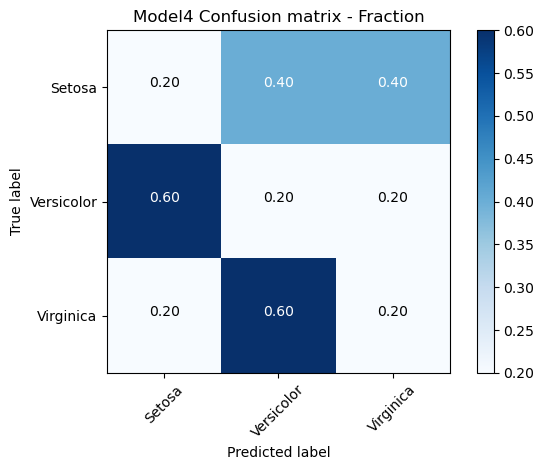

In [16]:
# Compute confusion matrix
# Show Ratio
for model in models:
    #print(model)
    cnf_matrix = confusion_matrix(df['NumericClass'],
                                  df[model.replace(' ','') + '_Prediction'],labels=NumericClass)
    np.set_printoptions(precision=2)
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=classes,
                      title= model + ' Confusion matrix - Fraction', normalize=True)

In [18]:
for model in models:
    print(model)
    print(classification_report(
    df['NumericClass'],
    df[model.replace(' ','') + '_Prediction'],
    labels=NumericClass,
    target_names=classes))

Model1
              precision    recall  f1-score   support

      Setosa       1.00      0.60      0.75         5
  Versicolor       0.50      0.80      0.62         5
   Virginica       0.75      0.60      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.67      0.68        15
weighted avg       0.75      0.67      0.68        15

Model2
              precision    recall  f1-score   support

      Setosa       0.00      0.00      0.00         5
  Versicolor       0.33      1.00      0.50         5
   Virginica       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

Model3
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         5
  Versicolor       0.60      0.60      0.60         5
   Virginica       0.60      0.60      0.60         5


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.